In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.rename(columns={'Year Experience': 'Years of Experience'}, inplace=True)
print(df.head())

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


In [5]:
df.rename(columns={'Years of Experience': 'Experience'}, inplace=True)
print(df.head())

   Experience   Salary
0         1.2  39344.0
1         1.4  46206.0
2         1.6  37732.0
3         2.1  43526.0
4         2.3  39892.0


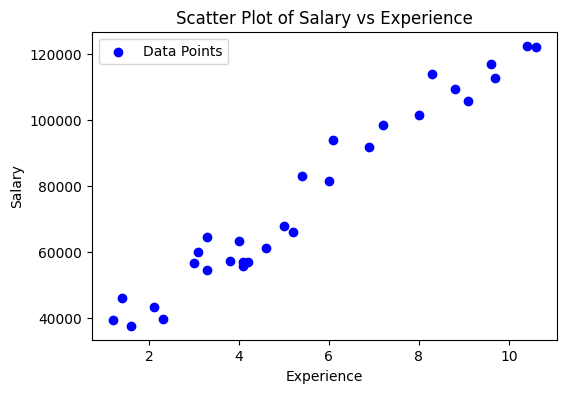

In [6]:
# Step 3: Scatter Plot
plt.figure(figsize=(6,4))
plt.scatter(df["Experience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs Experience")
plt.legend()
plt.show()

            Experience    Salary
Experience    1.000000  0.978242
Salary        0.978242  1.000000


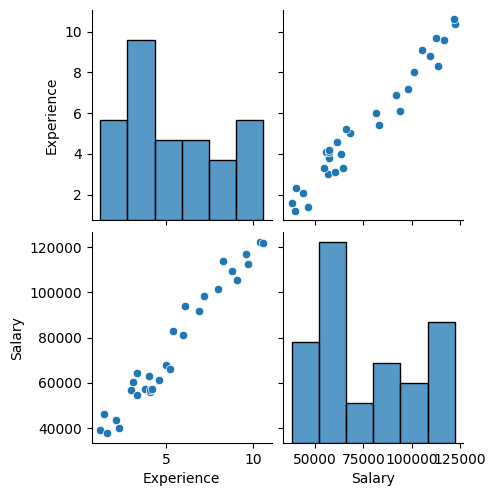

In [7]:
# Step 4: Correlation
print(df.corr())
sns.pairplot(df)
plt.show()

In [8]:
# Step 5: Define Independent & Dependent Variables
X = df[['Experience']]       # Independent variable (2D)
Y = df['Salary']             # Dependent variable (1D)

In [9]:
# Step 6: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (22, 1)
Test Shape: (8, 1)


In [10]:
# Step 7: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Step 8: Train Linear Regression Model
regression = LinearRegression()
regression.fit(X_train_scaled, Y_train)

print("Coefficient (Slope):", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient (Slope): [25063.1519945]
Intercept: 70417.40909090909


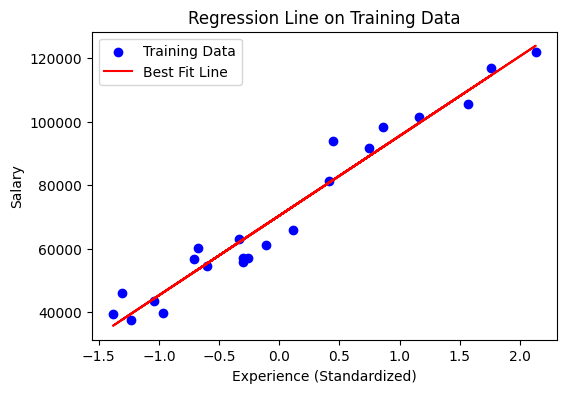

In [12]:
# Step 9: Plot Best Fit Line
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, Y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, regression.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

In [13]:
# Step 10: Predictions (Scaled Test Data)
Y_pred = regression.predict(X_test_scaled)

In [14]:
# Compare Actual vs Predicted
results = pd.DataFrame({
    "Actual Salary": Y_test.values,
    "Predicted Salary": Y_pred
})
print("\nComparison of Actual vs Predicted (first 10 rows):")
print(results.head(10))


Comparison of Actual vs Predicted (first 10 rows):
   Actual Salary  Predicted Salary
0       112636.0     115440.881801
1        67939.0      71397.106227
2       113813.0     102321.459290
3        83089.0      75145.512658
4        64446.0      55466.378891
5        57190.0      60151.886931
6       122392.0     122000.593057
7       109432.0     107006.967329


In [15]:
# Step 11: Performance Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 38802588.99247059
MAE: 5056.9954666635895
RMSE: 6229.172416338352
R2 Score: 0.9347210011126783


In [16]:
# Step 12: OLS Regression
X_train_ols = sm.add_constant(X_train_scaled)
model = sm.OLS(Y_train, X_train_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     428.3
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           5.62e-15
Time:                        17:38:13   Log-Likelihood:                -220.35
No. Observations:                  22   AIC:                             444.7
Df Residuals:                      20   BIC:                             446.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.042e+04   1211.034     58.146      0.0

In [18]:
# Step 13: Predict for New Data (YearsExperience = 5)
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
prediction = regression.predict(new_exp_scaled)[0]
print("Predicted Salary for 5 years of experience:", prediction)

Predicted Salary for 5 years of experience: 71397.10622651374
